# Exercices Pandas

## Données 

Observatoire Climatologie, Eau, Environnement et Littoral, l'ODCEEL

Données de Vérargues 1977-2020

<https://odee.herault.fr/index.php/thematiques/climatologie#ODEEart_130>


## Exercices

Calculer les normales journalières pour les températures 1981-2010 (pour chacun des 365 jours : température minimale moyenne et température maximale moyenne).

Calculer et visualiser les écarts à la moyenne pour l'année 2019.



In [90]:
from os.path import join
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

print(f"Version numpy : {np.__version__}")
print(f"Version pandas : {pd.__version__}")
print(f"Version matplotlib : {mpl.__version__}")


Version numpy : 1.22.3
Version pandas : 1.4.1
Version matplotlib : 3.5.1


In [2]:
# chemin d'acces donnees
d_data = "data"
f_meteo = join(d_data, "ODCEEL", "Station_123_19770101_J.csv")
print(f_meteo)

data\ODCEEL\Station_123_19770101_J.csv


In [ ]:
df_meteo = pd.read_csv(
    f_meteo, 
    encoding='latin_1', delimiter=';', decimal=',',
    header=0, names=['_date', 'rr', 'tn', 'tx']
    )
df_meteo.head()

_date   rr    tn    tx
0  01/01/1977  9.0  10.0  11.0
1  02/01/1977  0.0   4.0  11.0
2  03/01/1977  0.0   3.0  10.0
3  04/01/1977  3.0   1.0   8.0
4  05/01/1977  2.0   2.5   8.0

In [ ]:
df_meteo.dtypes

_date     object
rr       float64
tn       float64
tx       float64
dtype: object

In [ ]:
# serie temporelle 
df_meteo['_date'] = pd.to_datetime(df_meteo['_date'], format='%d/%m/%Y')
df_meteo.dtypes

_date    datetime64[ns]
rr              float64
tn              float64
tx              float64
dtype: object

In [ ]:
df_meteo['mm_dd_date'] = df_meteo['_date'].dt.strftime('%m%d')
df_meteo['yyyy_date'] = df_meteo['_date'].dt.year
df_meteo.head()

_date   rr    tn    tx mm_dd_date  yyyy_date
0 1977-01-01  9.0  10.0  11.0       0101       1977
1 1977-01-02  0.0   4.0  11.0       0102       1977
2 1977-01-03  0.0   3.0  10.0       0103       1977
3 1977-01-04  3.0   1.0   8.0       0104       1977
4 1977-01-05  2.0   2.5   8.0       0105       1977

In [20]:
df_meteo.dtypes

_date         datetime64[ns]
rr                   float64
tn                   float64
tx                   float64
mm_dd_date            object
yyyy_date              int64
dtype: object

In [59]:
# filtrer annees et enlever 29 fev
bool_test = (
    (df_meteo.yyyy_date > 1980) &
    (df_meteo.yyyy_date <= 2010))
df_meteo2 = df_meteo[bool_test]
len(df_meteo), len(df_meteo2)

(16071, 10957)

### Agréger des valeurs

In [60]:
# normales journalieres : 1981-2010
grouped = df_meteo2.groupby('mm_dd_date')
df_grouped_1981_2010 = grouped.agg(
    sum_rr=pd.NamedAgg(column='rr', aggfunc=np.sum),
    tn_mean = pd.NamedAgg(column='tn', aggfunc=np.mean),
    tx_mean = pd.NamedAgg(column='tx', aggfunc=np.mean),
    tn_min = pd.NamedAgg(column='tn', aggfunc=np.min),
    tx_max = pd.NamedAgg(column='tx', aggfunc=np.max),
)
df_grouped_1981_2010


sum_rr   tn_mean    tx_mean  tn_min  tx_max
mm_dd_date                                             
0101          33.1  1.950000  11.433333    -6.5    19.0
0102          43.3  2.300000  11.100000    -3.0    17.0
0103          47.3  1.566667  11.066667    -7.0    17.0
0104          22.3  1.583333  10.683333    -7.5    18.5
0105          65.3  0.450000  10.016667    -7.0    17.0
...            ...       ...        ...     ...     ...
1227          24.5  1.543333  10.806667    -4.5    16.0
1228          25.0  1.743333  10.783333    -4.5    16.5
1229         121.5  1.983333  10.716667    -5.5    17.5
1230          62.6  2.066667  10.666667    -6.5    17.0
1231          96.7  2.566667  11.040000    -6.5    18.0

[366 rows x 5 columns]

### Fonction `pivot`

In [63]:
df_tn = df_meteo2.pivot(
    index='mm_dd_date', columns='yyyy_date', values='tn')
df_tn

yyyy_date   1981  1982  1983  1984  1985  1986  1987  1988  1989  1990  ...  \
mm_dd_date                                                              ...   
0101         1.0   4.5   1.5   2.0  -4.0  -6.5   5.0   5.0  -2.0   0.0  ...   
0102         3.5   1.0  -2.5   2.5  -0.5   1.5   8.0   2.5  -2.0   1.0  ...   
0103         1.0   1.5   0.0  -0.5  -3.0   1.5   6.0   5.0  -2.0   1.5  ...   
0104         8.0   7.0   1.0   4.0  -7.0  -2.0   0.5   1.5  -1.0   1.0  ...   
0105         3.5   6.0   7.5   0.0  -7.0  -5.0  -2.5   1.5  -0.5  -1.0  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
1227         0.0   2.0   6.0  -1.0  -1.0   6.0   6.3   1.0   5.0   7.0  ...   
1228         3.5   1.0   4.0  -1.0   0.0   1.0   5.3  -1.0   4.0   4.0  ...   
1229         4.0   1.5   3.5   2.0   9.5   0.5   1.0  -1.0   2.5   5.0  ...   
1230         1.5   1.0   1.0   1.0  -1.0   3.0   0.0  -1.5   1.5  10.0  ...   
1231         6.5  -1.0   4.0  -1.5  -6.5   4.0   6.0  -2.0   0.0   9.0  ...   

yyyy_date   2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  
mm_dd_date                                                              
0101        -1.0  -2.0   4.0   0.5   2.0   1.0   8.5  -1.5   8.0   7.0  
0102        10.0  -2.5   6.0   0.0   4.0   3.0   9.0   3.0   4.0  -1.5  
0103         6.0   4.0   6.5  -2.5   2.5   3.0   1.5   5.0  -1.0  -4.5  
0104         7.0   7.0   6.0  -3.0  -0.5  -1.0   1.0   7.0  -3.5   1.0  
0105         4.5   0.0  -1.0  -1.0  -3.0  -4.5   3.5   7.0  -4.5   2.0  
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
1227        -2.5   6.5   3.5   3.0  -4.5  -2.0  -3.0   4.0   0.0  -3.0  
1228        -1.5   6.5   7.0  -1.5  -4.5  -0.5  -1.0  -0.5   3.0   2.0  
1229         6.5   4.0   2.0   4.0  -5.5   2.0  -2.5   2.0   5.5   0.5  
1230         7.0   5.0   0.5   2.0  -6.5   4.0   0.5   3.5   9.5   4.0  
1231         4.0   4.0  -2.0  -1.0  -1.0   7.0   2.5   9.5   7.0   6.5  

[366 rows x 30 columns]

### Calculer l'écart aux normales avec pandas

In [62]:
tn_mean = df_grouped_1981_2010.tn_mean
tn_mean

mm_dd_date
0101    1.950000
0102    2.300000
0103    1.566667
0104    1.583333
0105    0.450000
          ...   
1227    1.543333
1228    1.743333
1229    1.983333
1230    2.066667
1231    2.566667
Name: tn_mean, Length: 366, dtype: float64

In [65]:
df_tn_diff_from_norm = df_tn.subtract(tn_mean, axis='index')
df_tn_diff_from_norm

yyyy_date       1981      1982      1983      1984      1985      1986  \
mm_dd_date                                                               
0101       -0.950000  2.550000 -0.450000  0.050000 -5.950000 -8.450000   
0102        1.200000 -1.300000 -4.800000  0.200000 -2.800000 -0.800000   
0103       -0.566667 -0.066667 -1.566667 -2.066667 -4.566667 -0.066667   
0104        6.416667  5.416667 -0.583333  2.416667 -8.583333 -3.583333   
0105        3.050000  5.550000  7.050000 -0.450000 -7.450000 -5.450000   
...              ...       ...       ...       ...       ...       ...   
1227       -1.543333  0.456667  4.456667 -2.543333 -2.543333  4.456667   
1228        1.756667 -0.743333  2.256667 -2.743333 -1.743333 -0.743333   
1229        2.016667 -0.483333  1.516667  0.016667  7.516667 -1.483333   
1230       -0.566667 -1.066667 -1.066667 -1.066667 -3.066667  0.933333   
1231        3.933333 -3.566667  1.433333 -4.066667 -9.066667  1.433333   

yyyy_date       1987      1988      1989      1990  ...      2001      2002  \
mm_dd_date                                          ...                       
0101        3.050000  3.050000 -3.950000 -1.950000  ... -2.950000 -3.950000   
0102        5.700000  0.200000 -4.300000 -1.300000  ...  7.700000 -4.800000   
0103        4.433333  3.433333 -3.566667 -0.066667  ...  4.433333  2.433333   
0104       -1.083333 -0.083333 -2.583333 -0.583333  ...  5.416667  5.416667   
0105       -2.950000  1.050000 -0.950000 -1.450000  ...  4.050000 -0.450000   
...              ...       ...       ...       ...  ...       ...       ...   
1227        4.756667 -0.543333  3.456667  5.456667  ... -4.043333  4.956667   
1228        3.556667 -2.743333  2.256667  2.256667  ... -3.243333  4.756667   
1229       -0.983333 -2.983333  0.516667  3.016667  ...  4.516667  2.016667   
1230       -2.066667 -3.566667 -0.566667  7.933333  ...  4.933333  2.933333   
1231        3.433333 -4.566667 -2.566667  6.433333  ...  1.433333  1.433333   

yyyy_date       2003      2004      2005      2006      2007      2008  \
mm_dd_date                                                               
0101        2.050000 -1.450000  0.050000 -0.950000  6.550000 -3.450000   
0102        3.700000 -2.300000  1.700000  0.700000  6.700000  0.700000   
0103        4.933333 -4.066667  0.933333  1.433333 -0.066667  3.433333   
0104        4.416667 -4.583333 -2.083333 -2.583333 -0.583333  5.416667   
0105       -1.450000 -1.450000 -3.450000 -4.950000  3.050000  6.550000   
...              ...       ...       ...       ...       ...       ...   
1227        1.956667  1.456667 -6.043333 -3.543333 -4.543333  2.456667   
1228        5.256667 -3.243333 -6.243333 -2.243333 -2.743333 -2.243333   
1229        0.016667  2.016667 -7.483333  0.016667 -4.483333  0.016667   
1230       -1.566667 -0.066667 -8.566667  1.933333 -1.566667  1.433333   
1231       -4.566667 -3.566667 -3.566667  4.433333 -0.066667  6.933333   

yyyy_date       2009      2010  
mm_dd_date                      
0101        6.050000  5.050000  
0102        1.700000 -3.800000  
0103       -2.566667 -6.066667  
0104       -5.083333 -0.583333  
0105       -4.950000  1.550000  
...              ...       ...  
1227       -1.543333 -4.543333  
1228        1.256667  0.256667  
1229        3.516667 -1.483333  
1230        7.433333  1.933333  
1231        4.433333  3.933333  

[366 rows x 30 columns]

In [66]:
df_tx = df_meteo2.pivot(
    index='mm_dd_date', columns='yyyy_date', values='tx')
df_tx_diff_from_norm = df_tx.subtract(
    df_grouped_1981_2010.tx_mean, axis='index')
df_tx_diff_from_norm

yyyy_date       1981      1982      1983      1984       1985      1986  \
mm_dd_date                                                                
0101        0.566667  0.566667 -0.433333  3.566667  -0.433333 -3.933333   
0102       -0.100000  2.400000 -0.100000  0.900000  -2.600000 -2.100000   
0103        2.933333  1.933333  1.433333 -0.066667  -6.066667  0.933333   
0104        5.816667  3.316667  2.316667 -1.183333  -9.183333 -4.183333   
0105       -1.016667 -3.016667  6.983333 -2.016667 -12.016667 -7.516667   
...              ...       ...       ...       ...        ...       ...   
1227       -4.806667  3.193333  4.693333 -2.806667  -1.806667  2.693333   
1228        0.716667  2.716667  5.716667 -1.783333   1.716667  1.216667   
1229        1.283333  0.283333  5.283333 -3.216667   0.783333  4.283333   
1230        2.333333 -2.666667  1.333333 -3.166667  -4.666667  6.333333   
1231        2.460000 -3.040000  3.960000 -4.040000  -6.040000  4.960000   

yyyy_date       1987      1988      1989      1990  ...      2001      2002  \
mm_dd_date                                          ...                       
0101        7.566667  3.066667 -1.933333 -1.933333  ...  2.566667 -1.433333   
0102        4.900000  2.900000 -2.100000  3.900000  ...  5.900000 -1.100000   
0103        2.933333  3.433333 -1.066667 -1.066667  ...  4.933333 -1.066667   
0104        1.316667  3.816667  1.316667  2.816667  ...  4.316667  0.316667   
0105        4.983333  1.983333  2.483333  1.483333  ...  3.983333  0.983333   
...              ...       ...       ...       ...  ...       ...       ...   
1227        1.893333  1.693333  0.193333  1.193333  ... -1.306667  5.193333   
1228        4.216667  0.216667 -0.783333  0.216667  ...  3.216667  5.216667   
1229        6.783333 -1.716667 -2.216667  0.283333  ...  4.283333  5.283333   
1230        1.333333  1.333333 -1.666667  1.333333  ...  1.333333  0.833333   
1231        3.660000  1.960000 -0.040000 -0.040000  ... -2.040000  3.960000   

yyyy_date       2003      2004      2005      2006      2007      2008  \
mm_dd_date                                                               
0101        2.566667 -4.433333  5.566667  0.566667  6.066667 -0.933333   
0102        5.400000  0.900000  4.900000  0.900000  3.400000 -2.600000   
0103        5.933333 -3.066667  1.433333 -0.066667  3.933333 -0.566667   
0104        3.316667 -4.183333  1.316667 -1.683333  3.816667 -0.183333   
0105       -3.516667  0.483333  2.983333 -3.516667  6.483333 -0.016667   
...              ...       ...       ...       ...       ...       ...   
1227        3.193333 -1.806667 -3.306667  2.193333  2.193333 -3.306667   
1228        0.716667 -2.783333 -5.783333  1.216667  0.716667 -2.283333   
1229       -0.216667 -0.216667 -6.216667  0.283333 -0.216667 -5.716667   
1230        0.333333  1.333333 -8.166667  4.833333  3.333333  0.833333   
1231       -1.540000  2.460000 -6.040000  6.960000  0.960000  1.960000   

yyyy_date       2009      2010  
mm_dd_date                      
0101        2.566667  1.066667  
0102       -1.600000 -3.100000  
0103       -4.066667 -5.566667  
0104       -2.183333 -6.183333  
0105        0.983333 -2.516667  
...              ...       ...  
1227        2.693333 -4.806667  
1228        0.716667 -0.283333  
1229        1.783333 -2.716667  
1230        5.333333 -0.666667  
1231        1.960000  0.960000  

[366 rows x 30 columns]

### Calculer l'écart à la moyenne avec numpy

In [73]:
values_tn = df_meteo2.pivot(
    index='mm_dd_date', columns='yyyy_date', values='tn'
).to_numpy(dtype = np.float32)
values_tn

array([[ 1. ,  4.5,  1.5, ..., -1.5,  8. ,  7. ],
       [ 3.5,  1. , -2.5, ...,  3. ,  4. , -1.5],
       [ 1. ,  1.5,  0. , ...,  5. , -1. , -4.5],
       ...,
       [ 4. ,  1.5,  3.5, ...,  2. ,  5.5,  0.5],
       [ 1.5,  1. ,  1. , ...,  3.5,  9.5,  4. ],
       [ 6.5, -1. ,  4. , ...,  9.5,  7. ,  6.5]], dtype=float32)

In [86]:
# nanmean : calculer moyenne en ignorant les Nan (sans données le 29/02)
# axis = 0 -> resultat une ligne soit 30 valeurs 
# axis = 1 -> resultat une colonne soit 366 valeurs
values_tn_mean = np.nanmean(values_tn, axis=1, dtype=np.float32)
values_tn_diff_from_norm = values_tn - np.expand_dims(values_tn_mean, 1)
values_tn_diff_from_norm

array([[-0.95000005,  2.55      , -0.45000005, ..., -3.45      ,
         6.05      ,  5.05      ],
       [ 1.2       , -1.3       , -4.8       , ...,  0.70000005,
         1.7       , -3.8       ],
       [-0.5666667 , -0.06666672, -1.5666667 , ...,  3.4333334 ,
        -2.5666666 , -6.0666666 ],
       ...,
       [ 2.0166667 , -0.48333335,  1.5166667 , ...,  0.01666665,
         3.5166667 , -1.4833333 ],
       [-0.5666666 , -1.0666666 , -1.0666666 , ...,  1.4333334 ,
         7.4333334 ,  1.9333334 ],
       [ 3.9333334 , -3.5666666 ,  1.4333334 , ...,  6.9333334 ,
         4.4333334 ,  3.9333334 ]], dtype=float32)

In [88]:
values_tx = df_meteo2.pivot(
    index='mm_dd_date', columns='yyyy_date', values='tx'
).to_numpy(dtype = np.float32)
values_tx_mean = np.nanmean(values_tx, axis=1, dtype=np.float32)
values_tx_diff_from_norm = values_tx - np.expand_dims(values_tx_mean, 1)
values_tx_diff_from_norm

array([[ 0.5666666 ,  0.5666666 , -0.4333334 , ..., -0.9333334 ,
         2.5666666 ,  1.0666666 ],
       [-0.10000038,  2.3999996 , -0.10000038, ..., -2.6000004 ,
        -1.6000004 , -3.1000004 ],
       [ 2.9333334 ,  1.9333334 ,  1.4333334 , ..., -0.5666666 ,
        -4.0666666 , -5.5666666 ],
       ...,
       [ 1.2833338 ,  0.28333378,  5.283334  , ..., -5.716666  ,
         1.7833338 , -2.7166662 ],
       [ 2.333333  , -2.666667  ,  1.333333  , ...,  0.833333  ,
         5.333333  , -0.666667  ],
       [ 2.46      , -3.04      ,  3.96      , ...,  1.96      ,
         1.96      ,  0.96000004]], dtype=float32)

### Visualisation des résultats

Normales 1981-2010 pour les températures min et max.

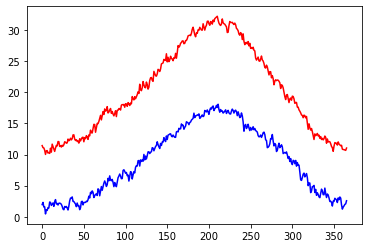

In [96]:
fig, ax = plt.subplots()
ax.plot(values_tx_mean, color='red')
ax.plot(values_tn_mean, color='blue')


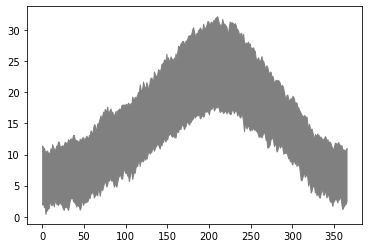

In [97]:
fig, ax = plt.subplots()
ax.fill_between(
    x=range(366),
    y1=values_tn_mean,
    y2=values_tx_mean,
    color='grey'
)
